In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6) # set default figure size
sns.set_theme() # set default style

# random generator
rng = np.random.default_rng()

# random generator (legacy)
# rng = np.random.RandomState(1234)

## Brownian Motion

\begin{equation*}
B(t + \Delta t) = B(t) + \sqrt{\Delta t} \cdot \epsilon
\end{equation*}

where $\epsilon$ is a random variable with a standard normal distribution:

\begin{equation*}
\epsilon \sim N(0, 1)
\end{equation*}

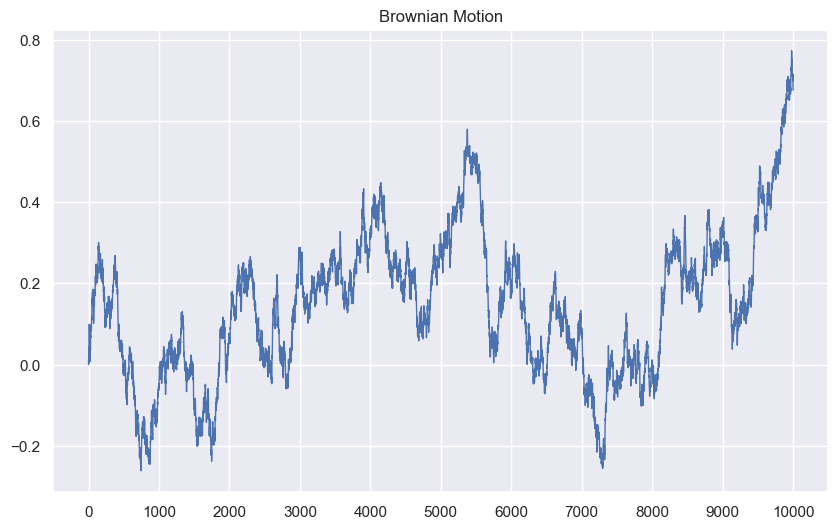

In [6]:
T = 1  # time horizon
n = 10000  # number of steps
dt = T / n  # time step

B = np.zeros(n + 1)

# for-loop method
"""
for i in range(n):
    B[i + 1] = B[i] + rng.standard_normal() * np.sqrt(dt)
"""

# vectorization method
B[1:] = np.cumsum(rng.standard_normal(n) * np.sqrt(dt))

# plot
fig, ax = plt.subplots()
ax.plot(B, linewidth=1)
plt.title("Brownian Motion")
plt.show()

## Geometric Brownian Motion

\begin{equation*}
S(t + \Delta t) = S(t) \cdot \exp{\left[\left(\mu - \frac{\sigma^2}{2}\right) \Delta t + \sigma \sqrt{\Delta t} \cdot \epsilon\right]}
\end{equation*}

where $\epsilon$ is a random variable with a normal distribution.

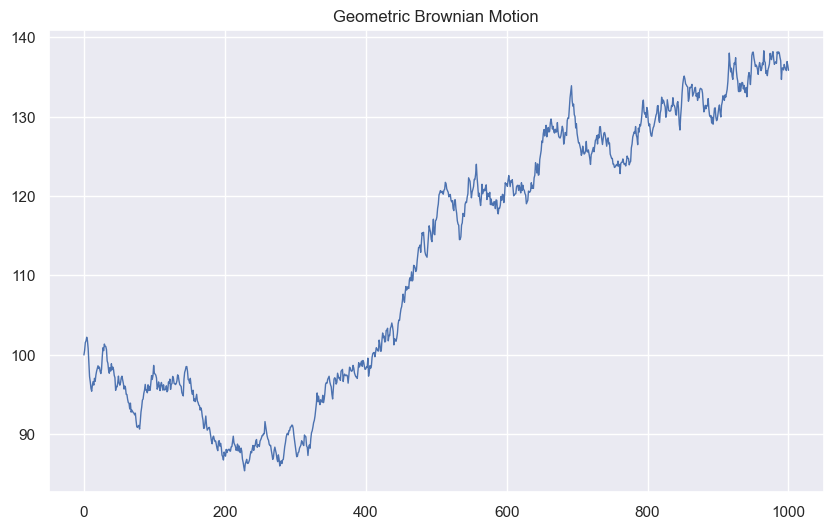

In [5]:
S0 = 100  # initial value
mu = 0.05  # drift
sigma = 0.2  # volatility
T = 1  # time horizon
n = 1000  # number of steps
dt = T / n  # time step

S = np.zeros(n + 1)
S[0] = S0

# for-loop method
"""
for i in range(n):
    S[i + 1] = S[i] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * rng.standard_normal() * np.sqrt(dt))
"""

# vectorization method
S[1:] = S[0] * np.cumprod(np.exp((mu - 0.5 * sigma ** 2)
                          * dt + sigma * rng.standard_normal(n) * np.sqrt(dt)))

# plot
fig, ax = plt.subplots()
ax.plot(S, linewidth=1)
plt.title("Geometric Brownian Motion")
plt.show()